In [420]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import xlrd

In [421]:
os.chdir(r"C:\Users\91844\Downloads")
df = pd.read_excel('Scytale_Round2_Dataset.xlsx', sheet_name='Dataset') 

In [422]:
df.shape

(899, 19)

In [423]:
df

,Age,Job Satisfaction,BusinessTravel,Department,Distance From Home,Education Field,Gender,JobRole,Marital Status,Monthly Income,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,41,Yes,Travel_Rarely,Sales,1,Life Sciences,Female,Sales Executive,Single,5993,Yes,11,3,1,8,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,Life Sciences,Male,Research Scientist,Married,5130,No,23,4,4,10,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,Other,Male,Laboratory Technician,Single,2090,Yes,15,3,2,7,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,Life Sciences,Female,Research Scientist,Married,2909,Yes,11,3,3,8,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,Medical,Male,Laboratory Technician,Married,3468,No,12,3,4,6,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,54,No,Travel_Rarely,Research & Development,3,Life Sciences,Male,Research Director,Married,17779,No,14,3,1,36,10,9,0,9
895,31,No,Travel_Rarely,Research & Development,11,Medical,Male,Healthcare Representative,Married,6833,Yes,12,3,4,6,6,5,0,1
896,31,No,Travel_Rarely,Research & Development,24,Medical,Female,Healthcare Representative,Single,6812,No,19,3,2,10,10,9,1,8
897,59,No,Travel_Rarely,Sales,3,Life Sciences,Female,Sales Executive,Single,5171,No,17,3,4,13,6,1,0,5


In [424]:
df.isnull().sum()

Age                           0
Job Satisfaction              0
BusinessTravel                0
Department                    0
Distance From Home            0
Education Field               0
Gender                        0
JobRole                       0
Marital Status                0
Monthly Income                0
Over Time                     0
Percent Salary Hike           0
Performance Rating            0
Relationship Satisfaction     0
Total Working Years           0
Years At Company              0
Years In Current Role         0
Years Since Last Promotion    0
Years With Curr Manager       0
dtype: int64

In [425]:
df.dtypes

Age                            int64
Job Satisfaction              object
BusinessTravel                object
Department                    object
Distance From Home             int64
Education Field               object
Gender                        object
JobRole                       object
Marital Status                object
Monthly Income                 int64
Over Time                     object
Percent Salary Hike            int64
Performance Rating             int64
Relationship Satisfaction      int64
Total Working Years            int64
Years At Company               int64
Years In Current Role          int64
Years Since Last Promotion     int64
Years With Curr Manager        int64
dtype: object

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         899 non-null    int64 
 1   Job Satisfaction            899 non-null    object
 2   BusinessTravel              899 non-null    object
 3   Department                  899 non-null    object
 4   Distance From Home          899 non-null    int64 
 5   Education Field             899 non-null    object
 6   Gender                      899 non-null    object
 7   JobRole                     899 non-null    object
 8   Marital Status              899 non-null    object
 9   Monthly Income              899 non-null    int64 
 10  Over Time                   899 non-null    object
 11  Percent Salary Hike         899 non-null    int64 
 12  Performance Rating          899 non-null    int64 
 13  Relationship Satisfaction   899 non-null    int64 

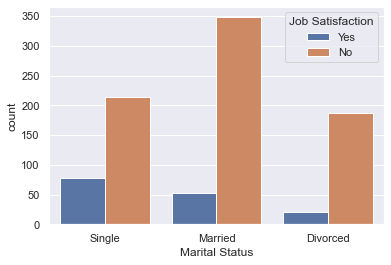

In [427]:
sns.countplot(x = 'Marital Status', hue = 'Job Satisfaction', data = df)


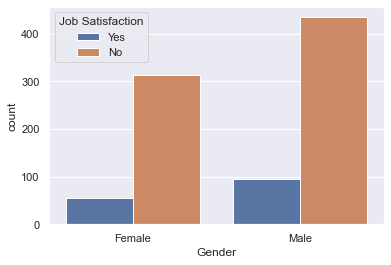

In [428]:
sns.countplot(x = 'Gender', hue = 'Job Satisfaction', data = df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

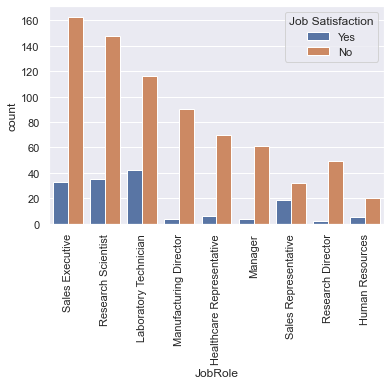

In [429]:
import matplotlib.pyplot as plt  
sns.countplot(x = 'JobRole', hue = 'Job Satisfaction', data = df)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

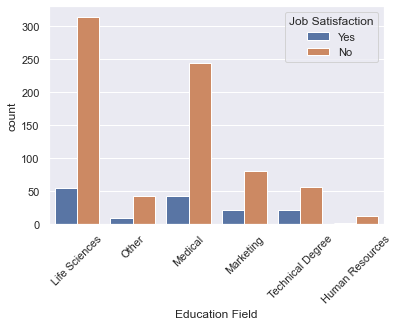

In [430]:
import matplotlib.pyplot as plt  
sns.countplot(x = 'Education Field', hue = 'Job Satisfaction', data = df)
plt.xticks(rotation=45)

In [431]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.shape
df_cat = df.select_dtypes(include = ['object'])
df_cat.shape
df_cat.head()

,Job Satisfaction,BusinessTravel,Department,Education Field,Gender,JobRole,Marital Status,Over Time
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002075E514DF0>,
      dtype=object)

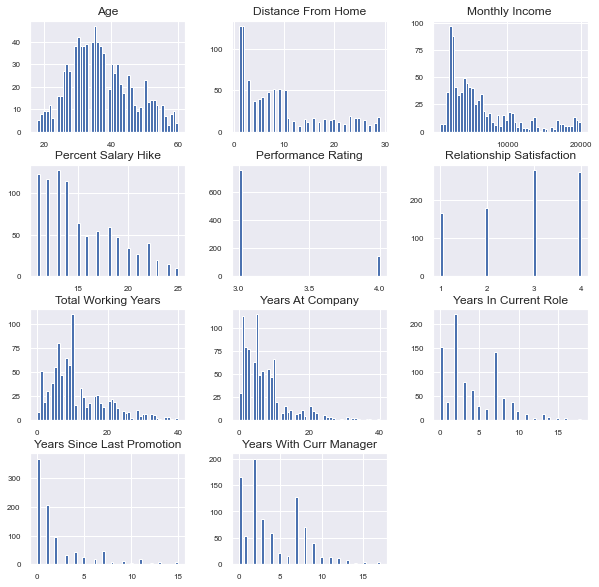

In [432]:
df_num.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8)

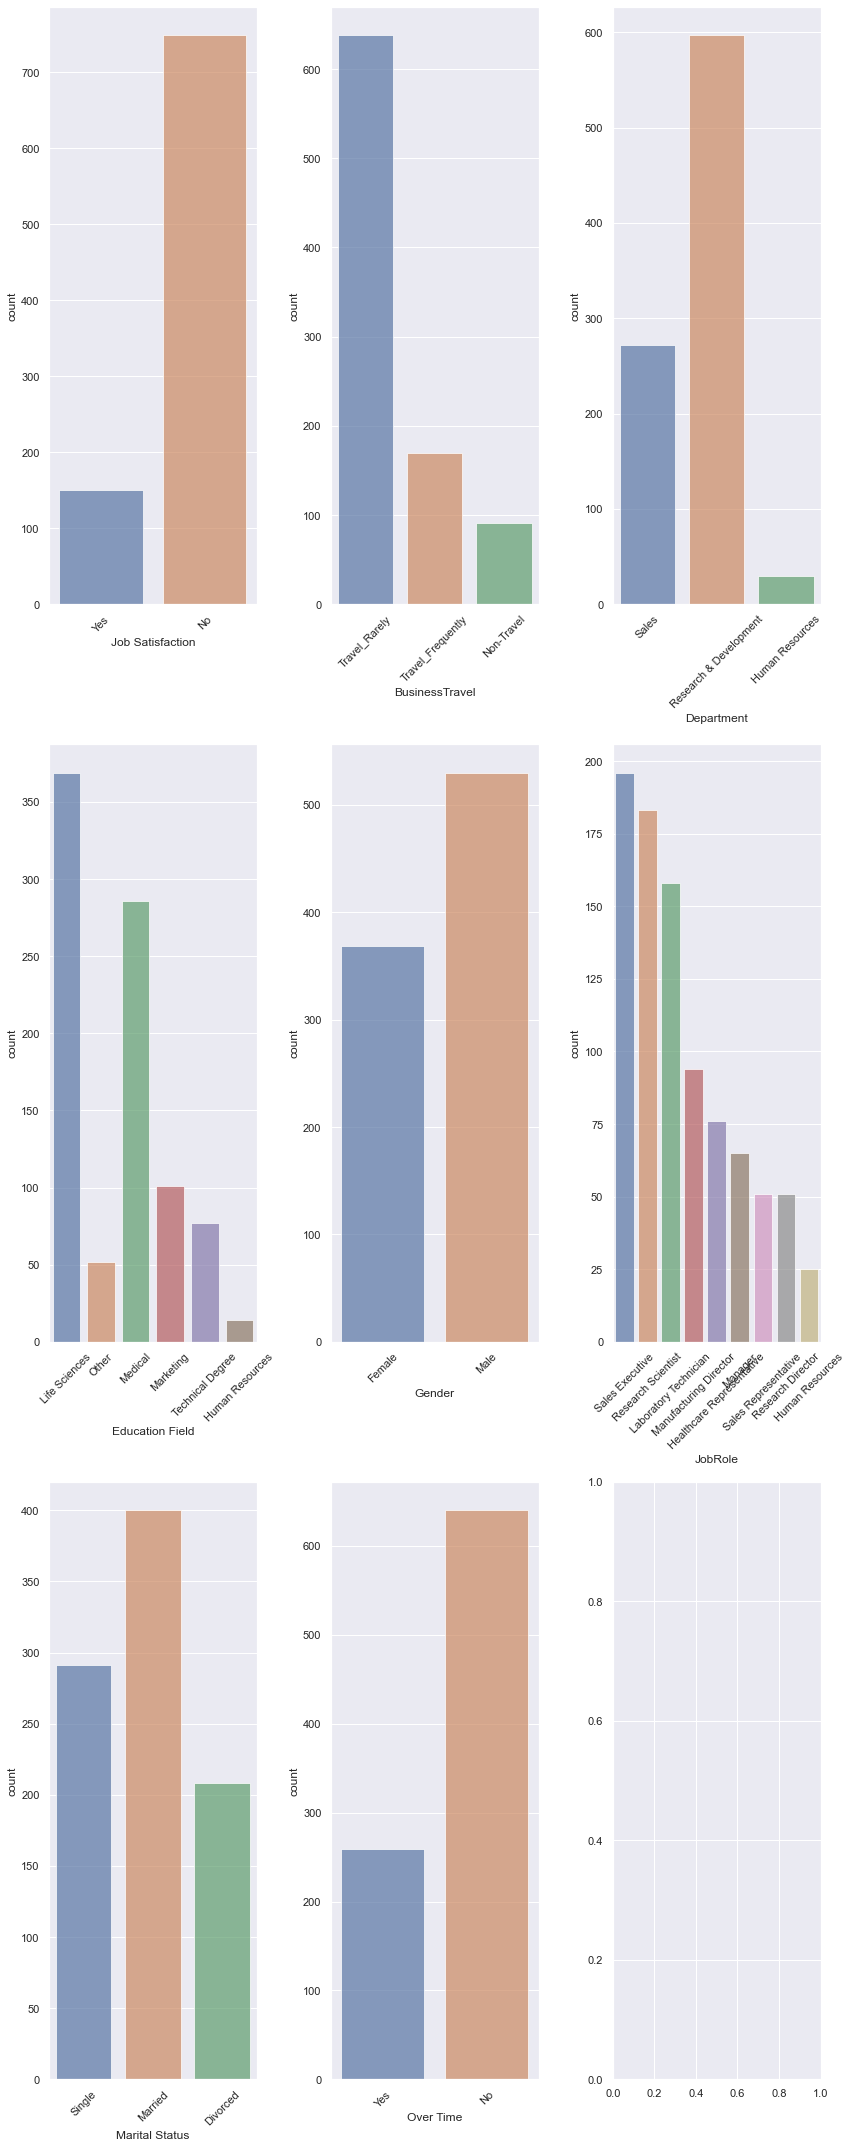

In [433]:
import matplotlib.pyplot as plt  
fig, axes = plt.subplots(round(len(df_cat.columns) / 3), 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_cat.columns[i], alpha=0.7, data=df_cat, ax=ax)

fig.tight_layout()

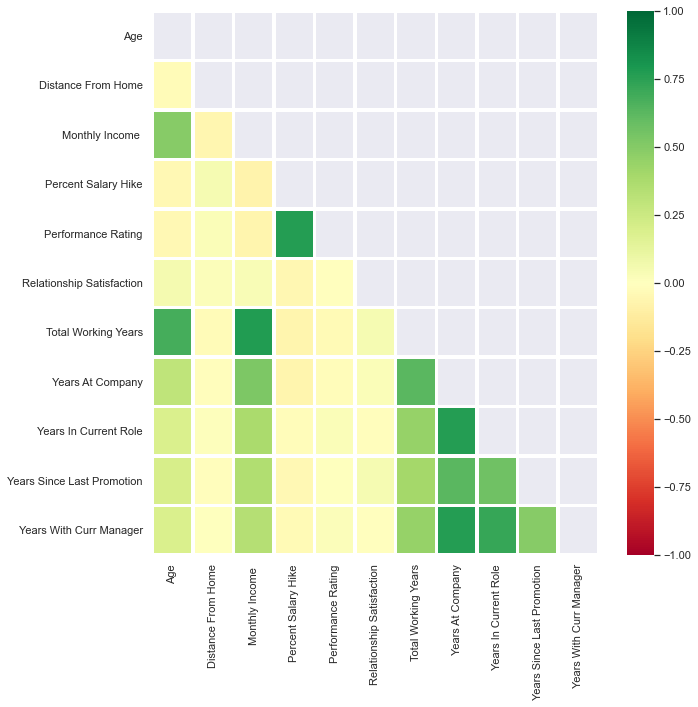

In [434]:
import seaborn
fig, ax = plt.subplots(figsize=(10,10))
corr_data = df_num.corr(method='pearson')
mask = np.zeros_like(corr_data)
mask[np.triu_indices_from(mask)] = True
seaborn.heatmap(corr_data, cmap='RdYlGn', vmax=1.0,vmin=-1.0, mask = mask, linewidth=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [435]:
corr_data

,Age,Distance From Home,Monthly Income,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
Age,1.000000,-0.029026,0.495197,-0.041165,-0.045112,0.061167,0.683431,0.303491,0.192310,0.203710,0.187752
Distance From Home,-0.029026,1.000000,-0.055336,0.048922,0.028236,0.017027,-0.026623,-0.014391,0.013600,-0.008116,0.006740
Monthly Income,0.495197,-0.055336,1.000000,-0.077649,-0.067010,0.037517,0.775615,0.524357,0.377939,0.354826,0.343241
Percent Salary Hike,-0.041165,0.048922,-0.077649,1.000000,0.773388,-0.050720,-0.069521,-0.069612,-0.016960,-0.046207,-0.032878
Performance Rating,-0.045112,0.028236,-0.067010,0.773388,1.000000,-0.006905,-0.031554,-0.019236,0.028846,0.006535,0.016372
Relationship Satisfaction,0.061167,0.017027,0.037517,-0.050720,-0.006905,1.000000,0.048609,0.030602,-0.011395,0.048167,-0.004521
Total Working Years,0.683431,-0.026623,0.775615,-0.069521,-0.031554,0.048609,1.000000,0.625608,0.450022,0.401162,0.451229
Years At Company,0.303491,-0.014391,0.524357,-0.069612,-0.019236,0.030602,0.625608,1.000000,0.766004,0.625954,0.769730
Years In Current Role,0.192310,0.013600,0.377939,-0.016960,0.028846,-0.011395,0.450022,0.766004,1.000000,0.564177,0.723704
Years Since Last Promotion,0.203710,-0.008116,0.354826,-0.046207,0.006535,0.048167,0.401162,0.625954,0.564177,1.000000,0.499093


In [436]:
df = df.drop(['Years At Company'], axis = 1)
#df = df.drop(['Years In Current Role'], axis = 1)
#df = df.drop(['Years With Curr Manager'], axis = 1)
df = df.drop(['Total Working Years'], axis = 1)
df = df.drop(['Performance Rating'], axis = 1)

In [437]:
df.columns

Index(['Age', 'Job Satisfaction', 'BusinessTravel', 'Department',
       'Distance From Home', 'Education Field', 'Gender', 'JobRole',
       'Marital Status', 'Monthly Income ', 'Over Time', 'Percent Salary Hike',
       'Relationship Satisfaction', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager'],
      dtype='object')

In [438]:
data = pd.get_dummies(df, columns = ['BusinessTravel', 'Department','Education Field', 'Gender', 'JobRole',
       'Marital Status','Over Time'], drop_first = "True")
data

,Age,Job Satisfaction,Distance From Home,Monthly Income,Percent Salary Hike,Relationship Satisfaction,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,BusinessTravel_Travel_Frequently,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Marital Status_Married,Marital Status_Single,Over Time_Yes
0,41,Yes,1,5993,11,1,4,0,5,0,...,0,0,0,0,0,1,0,0,1,1
1,49,No,8,5130,23,4,7,1,7,1,...,0,0,0,0,1,0,0,1,0,0
2,37,Yes,2,2090,15,2,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,33,No,3,2909,11,3,7,3,0,1,...,0,0,0,0,1,0,0,1,0,1
4,27,No,2,3468,12,4,2,2,2,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,54,No,3,17779,14,1,9,0,9,0,...,0,0,0,1,0,0,0,1,0,0
895,31,No,11,6833,12,4,5,0,1,0,...,0,0,0,0,0,0,0,1,0,1
896,31,No,24,6812,19,2,9,1,8,0,...,0,0,0,0,0,0,0,0,1,0
897,59,No,3,5171,17,4,1,0,5,0,...,0,0,0,0,0,1,0,0,1,0


In [439]:
data = data.drop(['Job Satisfaction'], axis = 1)

In [440]:
data.head()

,Age,Distance From Home,Monthly Income,Percent Salary Hike,Relationship Satisfaction,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Marital Status_Married,Marital Status_Single,Over Time_Yes
0,41,1,5993,11,1,4,0,5,0,1,...,0,0,0,0,0,1,0,0,1,1
1,49,8,5130,23,4,7,1,7,1,0,...,0,0,0,0,1,0,0,1,0,0
2,37,2,2090,15,2,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,33,3,2909,11,3,7,3,0,1,0,...,0,0,0,0,1,0,0,1,0,1
4,27,2,3468,12,4,2,2,2,0,1,...,1,0,0,0,0,0,0,1,0,0


In [441]:
data.shape

(899, 29)

In [442]:
data['Job Satisafction'] = df['Job Satisfaction'].replace('Yes',1).replace('No',0)

In [443]:
data.shape

(899, 30)

In [444]:
data.dtypes

Age                                  int64
Distance From Home                   int64
Monthly Income                       int64
Percent Salary Hike                  int64
Relationship Satisfaction            int64
Years In Current Role                int64
Years Since Last Promotion           int64
Years With Curr Manager              int64
BusinessTravel_Travel_Frequently     uint8
BusinessTravel_Travel_Rarely         uint8
Department_Research & Development    uint8
Department_Sales                     uint8
Education Field_Life Sciences        uint8
Education Field_Marketing            uint8
Education Field_Medical              uint8
Education Field_Other                uint8
Education Field_Technical Degree     uint8
Gender_Male                          uint8
JobRole_Human Resources              uint8
JobRole_Laboratory Technician        uint8
JobRole_Manager                      uint8
JobRole_Manufacturing Director       uint8
JobRole_Research Director            uint8
JobRole_Res

In [445]:
data.columns

Index(['Age', 'Distance From Home', 'Monthly Income ', 'Percent Salary Hike',
       'Relationship Satisfaction', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'Education Field_Life Sciences', 'Education Field_Marketing',
       'Education Field_Medical', 'Education Field_Other',
       'Education Field_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'Marital Status_Married', 'Marital Status_Single', 'Over Time_Yes',
       'Job Satisafction'],
      dtype='object')

In [446]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
import sklearn

In [447]:
X = data.drop(['Job Satisafction'], axis = 1)
y = data['Job Satisafction']

In [448]:
#scaling data numeric data values between 0 to 1 for equal weightages
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[0:1]

array([[ 0.4366608 , -0.99318755, -0.11314111, -1.17349669, -1.60309632,
        -0.06229245, -0.67194133,  0.2495274 , -0.48290388,  0.63960215,
        -1.40599473,  1.51827108,  1.19846333, -0.35576174, -0.68305045,
        -0.24777642, -0.30606203, -1.19846333, -0.16912752, -0.46176333,
        -0.27917315, -0.34171653, -0.24523766, -0.50555573,  1.89386765,
        -0.24523766, -0.89532296,  1.44545739,  1.57195498]])

In [449]:
#Prediction using logistic regression algorithm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size = 0.15)

In [450]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X_train, y_train)

y_sm.value_counts()

1    637
0    637
Name: Job Satisafction, dtype: int64

In [451]:
model = LogisticRegression()
model.fit(X_sm,y_sm)

LogisticRegression()

Feature: 0, Score: -0.54832
Feature: 1, Score: 0.27961
Feature: 2, Score: 0.31981
Feature: 3, Score: -0.07493
Feature: 4, Score: -0.24755
Feature: 5, Score: -0.50562
Feature: 6, Score: 0.84426
Feature: 7, Score: -0.58302
Feature: 8, Score: 0.58814
Feature: 9, Score: 0.49789
Feature: 10, Score: 0.55027
Feature: 11, Score: 0.21690
Feature: 12, Score: -0.05381
Feature: 13, Score: 0.14348
Feature: 14, Score: 0.08565
Feature: 15, Score: -0.12207
Feature: 16, Score: 0.17110
Feature: 17, Score: 0.12614
Feature: 18, Score: 0.58209
Feature: 19, Score: 0.96292
Feature: 20, Score: 0.15094
Feature: 21, Score: -0.08478
Feature: 22, Score: -0.11750
Feature: 23, Score: 0.46768
Feature: 24, Score: 1.02943
Feature: 25, Score: 0.64202
Feature: 26, Score: 0.18589
Feature: 27, Score: 0.66428
Feature: 28, Score: 0.88948


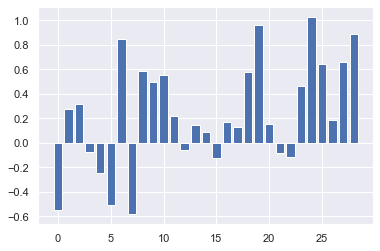

In [452]:
from matplotlib import pyplot
importance = model.coef_[0]
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [453]:
len(X_test)

135

In [454]:
X.shape

(899, 29)

In [455]:
pred = model.predict(X_test)

In [456]:
model.intercept_

array([-0.9306594])

In [457]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred)
cnf_matrix

array([[86, 26],
       [ 8, 15]], dtype=int64)

In [458]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))

Accuracy: 0.7481481481481481
Precision: 0.36585365853658536


In [459]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=4)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [460]:
model.feature_importances_

array([0.12212435, 0.13304149, 0.24347757, 0.        , 0.03656256,
       0.        , 0.0193628 , 0.05068627, 0.0354882 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.05101873, 0.        ,
       0.        , 0.        , 0.09453959, 0.21369845])

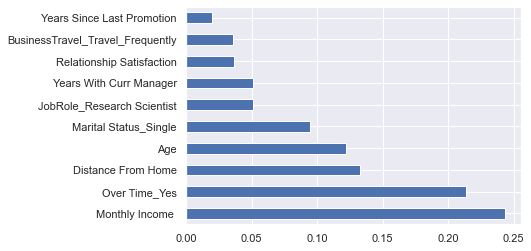

In [461]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [462]:
pred = model.predict(X_test)

In [463]:
featuredf = pd.DataFrame()
featuredf['Column'] = X.columns
featuredf['Score'] = model.feature_importances_

In [464]:
featuredf

,Column,Score
0,Age,0.122124
1,Distance From Home,0.133041
2,Monthly Income,0.243478
3,Percent Salary Hike,0.000000
4,Relationship Satisfaction,0.036563
5,Years In Current Role,0.000000
6,Years Since Last Promotion,0.019363
7,Years With Curr Manager,0.050686
8,BusinessTravel_Travel_Frequently,0.035488
9,BusinessTravel_Travel_Rarely,0.000000


In [465]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,pred)
cnf_matrix

array([[106,   6],
       [ 17,   6]], dtype=int64)

In [466]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Precision:",metrics.precision_score(y_test, pred))

Accuracy: 0.8296296296296296
Precision: 0.5


In [467]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=4, random_state=0)
classifier.fit(X_sm, y_sm)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [468]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy  ' + str(accuracy_score(y_test, y_pred)))

[[103   9]
 [ 15   8]]
Accuracy  0.8222222222222222


In [469]:
#features1 = pd.DataFrame(cols1)
#importance = classifier.feature_importances_

#feature_imp1 = pd.Series(importance,index= features1).sort_values(ascending=False)
#print(feature_imp1)


featuredf = pd.DataFrame()
featuredf['Column'] = X.columns
featuredf['Score'] = classifier.feature_importances_

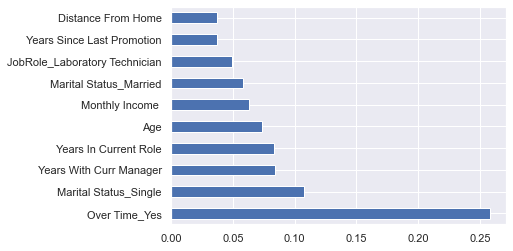

In [470]:
(pd.Series(classifier.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [471]:
# Try with 2 Pricipal components
from sklearn.decomposition import PCA
#X_sm, y_sm
sc = StandardScaler()
X_train2 = sc.fit_transform(X_sm)
X_test2 = sc.transform(X_test)

pca_2 = PCA(n_components=2)

X_train2 = pca_2.fit_transform(X_train2)
X_test2 = pca_2.transform(X_test2)

In [472]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(max_depth=5, random_state=0)
classifier2.fit(X_train2, y_sm)

# Predicting the Test set results
y_pred2 = classifier2.predict(X_test2)

In [473]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print('Accuracy  ' + str(accuracy_score(y_test, y_pred2)))

[[80 32]
 [12 11]]
Accuracy  0.674074074074074


In [474]:
# xgboost ORIGINAL 
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
#X_train, X_test, y_train, y_test
# Remove 'id' and 'target' columns
#labels = df.columns[2:]
#X_sm, y_sm
model = XGBClassifier()
model.fit(X_train,y_train)
Y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,Y_pred)
print(cm)
print('Accuracy  ' + str(accuracy_score(y_test, Y_pred)))
print("Classification Report: \n", classification_report(y_test,Y_pred))

[[105   7]
 [ 15   8]]
Accuracy  0.837037037037037
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       112
           1       0.53      0.35      0.42        23

    accuracy                           0.84       135
   macro avg       0.70      0.64      0.66       135
weighted avg       0.82      0.84      0.82       135



In [475]:
# sensitivity 
sen = cm[0][0]/sum(cm[0])
print(sen)
sif = cm[1][1]/sum(cm[1])
print(sif) 

0.9375
0.34782608695652173


In [476]:
cols1 = X.columns
cols1

Index(['Age', 'Distance From Home', 'Monthly Income ', 'Percent Salary Hike',
       'Relationship Satisfaction', 'Years In Current Role',
       'Years Since Last Promotion', 'Years With Curr Manager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'Education Field_Life Sciences', 'Education Field_Marketing',
       'Education Field_Medical', 'Education Field_Other',
       'Education Field_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'Marital Status_Married', 'Marital Status_Single', 'Over Time_Yes'],
      dtype='object')

In [477]:
# Feature Importance (MSS Claims Decile as dependent variable)
features1 = pd.DataFrame(cols1)
feature_imp1 = pd.Series(model.feature_importances_,index= features1).sort_values(ascending=False)
feature_imp1

(JobRole_Manager,)                      0.108926
(Over Time_Yes,)                        0.079802
(JobRole_Research Scientist,)           0.061133
(Marital Status_Single,)                0.058361
(Education Field_Marketing,)            0.051672
(BusinessTravel_Travel_Frequently,)     0.049037
(Education Field_Technical Degree,)     0.043534
(JobRole_Sales Executive,)              0.041667
(Monthly Income ,)                      0.038865
(JobRole_Sales Representative,)         0.038105
(JobRole_Laboratory Technician,)        0.036960
(Years Since Last Promotion,)           0.032158
(Years In Current Role,)                0.031968
(Years With Curr Manager,)              0.030874
(Age,)                                  0.030772
(Relationship Satisfaction,)            0.030560
(Department_Sales,)                     0.030398
(Distance From Home,)                   0.029465
(Education Field_Medical,)              0.027303
(Gender_Male,)                          0.027057
(Percent Salary Hike

In [478]:
featuredf1 = pd.DataFrame(cols1)
featuredf1['Column'] = X.columns
featuredf1['Score'] = model.feature_importances_ 

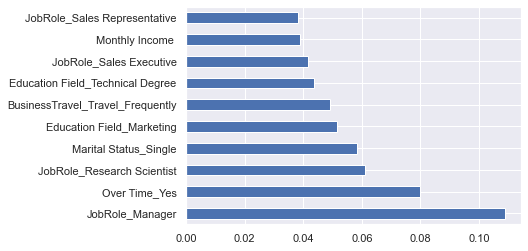

In [479]:
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh')) 

In [481]:
#feature_imp1.to_csv('feature_imp_2.csv')